In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash", google_api_key=os.getenv("GOOGLE_API_KEY"))

In [5]:
#create a state
class LLMState(TypedDict):
    question: str
    answer: str

In [7]:
def llm_node(state: LLMState) -> LLMState:
    #extract the question from state
    question = state["question"]

    #create a prompt
    prompt = f"Please answer the following question:\n{question}"

    #ask the question to LLM
    response = model.invoke(prompt).content

    #update the state with the answer
    state["answer"] = response
    return state

In [11]:
#create a graph
graph = StateGraph(LLMState)

#create nodes
graph.add_node('llm', llm_node)

#create edges
graph.add_edge(START, "llm")
graph.add_edge("llm", END)

#compile the graph
workflow = graph.compile()

#execute the graph
initial_state = {"question": "What is the capital of France?"}
output = workflow.invoke(initial_state)
print("Question:", output["question"])
print("Answer:", output["answer"])


Question: What is the capital of France?
Answer: The capital of France is **Paris**.


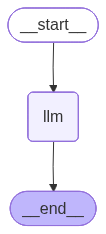

In [20]:
from IPython.display import Image, display
display(Image(data=workflow.get_graph().draw_mermaid_png()))